In [10]:
import pandas as pd
import numpy as np

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
df = pd.read_csv('car.data', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
colums = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = colums
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


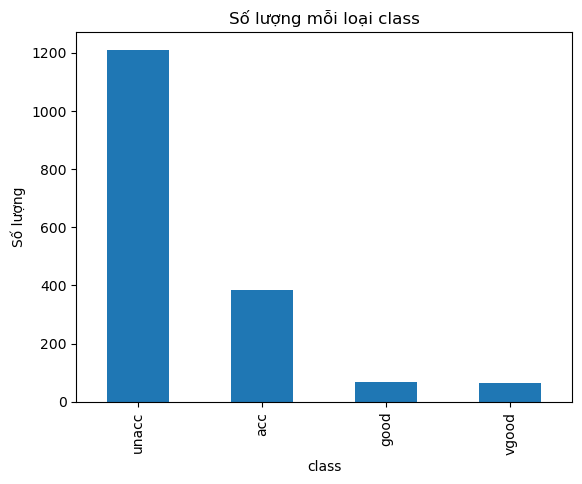

In [14]:
import matplotlib.pyplot as plt
df['class'].value_counts().plot(kind='bar')
plt.title("Số lượng mỗi loại class")
plt.xlabel("class")
plt.ylabel("Số lượng")
plt.show()


In [15]:
df = pd.get_dummies(df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
from sklearn.preprocessing import LabelEncoder
df['class'] = LabelEncoder().fit_transform(df['class'])
df.head()

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,False,True,False
1,2,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,False,False,True
2,2,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,True,False,False
3,2,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
4,2,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [16]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8641618497109826
